In [1]:
import scvelo as scv
from IPython.display import clear_output
import matplotlib.backends.backend_pdf
from tqdm.notebook import tqdm
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import scanpy.external as sce
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
scv.settings.verbosity=1

In [2]:
carcinoid_data_str = sc.read("/fast/users/bischofp_c/scratch/data/Carcinoids/str_anno_carcinoid.h5ad")
carcinoid_data_imm = sc.read("/fast/users/bischofp_c/scratch/data/Carcinoids/imm_anno_carcinoid.h5ad")

In [3]:
carcinoid_data_str

AnnData object with n_obs × n_vars = 3627 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pMT', 'pHB', 'pRP', 'cell_id', 'sample_id_old', 'sample_id', 'patient_id', 'patient_id_old', 'tissue_type', 'W_no', 'date_of_surgery', 'topography', 'morphology', 'histo_subtype', 'tnm', 'sex', 'age', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.2', 'seurat_clusters', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.1', 'SCT_snn_res.2', 'main_cell_type', 'S.Score', 'G2M.Score', 'Phase', 'CC.Diff', 'T_Club1', 'T_Ciliated2', 'T_Proximal.Ciliated3', 'T_Basal4', 'T_Proximal.Basal5', 'T_Differentiating.Basal6', 'T_Proliferating.Basal7', 'T_Goblet8', 'T_Mucous9', 'T_Serous10', 'T_Ionocyte11', 'T_Neuroendocrine12', 'T_Alveolar.Epithelial.Type.113', 'T_Alveolar.Epithelial.Type.214', 'T_Signaling.Alveolar.Epithelial.Type.215', 'T_Artery16', 'T_Vein17', 'T_Capillary.Aerocyte18', 'T_Capillary19', 'T_Capillary.Intermediate.120', 'T_Capillary.Intermediate.221', 'T_Bronchial.Ve

In [4]:
carcinoid_data_imm

AnnData object with n_obs × n_vars = 2445 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pMT', 'pHB', 'pRP', 'cell_id', 'sample_id_old', 'sample_id', 'patient_id', 'patient_id_old', 'tissue_type', 'W_no', 'date_of_surgery', 'topography', 'morphology', 'histo_subtype', 'tnm', 'sex', 'age', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.2', 'seurat_clusters', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.1', 'SCT_snn_res.2', 'main_cell_type', 'S.Score', 'G2M.Score', 'Phase', 'CC.Diff', 'T_Club1', 'T_Ciliated2', 'T_Proximal.Ciliated3', 'T_Basal4', 'T_Proximal.Basal5', 'T_Differentiating.Basal6', 'T_Proliferating.Basal7', 'T_Goblet8', 'T_Mucous9', 'T_Serous10', 'T_Ionocyte11', 'T_Neuroendocrine12', 'T_Alveolar.Epithelial.Type.113', 'T_Alveolar.Epithelial.Type.214', 'T_Signaling.Alveolar.Epithelial.Type.215', 'T_Artery16', 'T_Vein17', 'T_Capillary.Aerocyte18', 'T_Capillary19', 'T_Capillary.Intermediate.120', 'T_Capillary.Intermediate.221', 'T_Bronchial.Ve

In [5]:
nsclc_data_str = sc.read("/fast/users/bischofp_c/scratch/data/Carcinoids/str_anno.h5ad")
nsclc_data_imm = sc.read("/fast/users/bischofp_c/scratch/data/Carcinoids/imm_anno.h5ad")

In [6]:
nsclc_data_str

AnnData object with n_obs × n_vars = 3899 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pMT', 'pHB', 'pRP', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.2', 'seurat_clusters', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.1', 'SCT_snn_res.2', 'main_cell_type', 'cell_id', 'sample_id', 'patient_id', 'tissue_type', 'W_no', 'date_of_surgery', 'topography', 'morphology', 'histo_subtype', 'tnm', 'sex', 'age', 'frozen', 'ffpe', 'S.Score', 'G2M.Score', 'Phase', 'CC.Diff', 'T_Club1', 'T_Ciliated2', 'T_Proximal.Ciliated3', 'T_Basal4', 'T_Proximal.Basal5', 'T_Differentiating.Basal6', 'T_Proliferating.Basal7', 'T_Goblet8', 'T_Mucous9', 'T_Serous10', 'T_Ionocyte11', 'T_Neuroendocrine12', 'T_Alveolar.Epithelial.Type.113', 'T_Alveolar.Epithelial.Type.214', 'T_Signaling.Alveolar.Epithelial.Type.215', 'T_Artery16', 'T_Vein17', 'T_Capillary.Aerocyte18', 'T_Capillary19', 'T_Capillary.Intermediate.120', 'T_Capillary.Intermediate.221', 'T_Bronchial.Vessel.122', 'T_Bro

In [7]:
nsclc_data_imm

AnnData object with n_obs × n_vars = 88956 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pMT', 'pHB', 'pRP', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.2', 'seurat_clusters', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.1', 'SCT_snn_res.2', 'main_cell_type', 'cell_id', 'sample_id', 'patient_id', 'tissue_type', 'W_no', 'date_of_surgery', 'topography', 'morphology', 'histo_subtype', 'tnm', 'sex', 'age', 'frozen', 'ffpe', 'S.Score', 'G2M.Score', 'Phase', 'CC.Diff', 'T_Club1', 'T_Ciliated2', 'T_Proximal.Ciliated3', 'T_Basal4', 'T_Proximal.Basal5', 'T_Differentiating.Basal6', 'T_Proliferating.Basal7', 'T_Goblet8', 'T_Mucous9', 'T_Serous10', 'T_Ionocyte11', 'T_Neuroendocrine12', 'T_Alveolar.Epithelial.Type.113', 'T_Alveolar.Epithelial.Type.214', 'T_Signaling.Alveolar.Epithelial.Type.215', 'T_Artery16', 'T_Vein17', 'T_Capillary.Aerocyte18', 'T_Capillary19', 'T_Capillary.Intermediate.120', 'T_Capillary.Intermediate.221', 'T_Bronchial.Vessel.122', 'T_Br

In [8]:
var_names_str = nsclc_data_str.var_names.intersection(carcinoid_data_str.var_names)
nsclc_data_str = nsclc_data_str[:, var_names_str]
carcinoid_data_str = carcinoid_data_str[:, var_names_str]

In [9]:
var_names_imm = nsclc_data_imm.var_names.intersection(carcinoid_data_imm.var_names)
nsclc_data_imm = nsclc_data_imm[:, var_names_imm]
carcinoid_data_imm = carcinoid_data_imm[:, var_names_imm]

In [10]:
sc.pp.pca(nsclc_data_str)
sc.pp.neighbors(nsclc_data_str)
nsclc_data_str.uns['umap'] = {'params': {'a': 0.583030019901822, 'b': 1.3341669931033755}}

In [11]:
sc.pp.pca(nsclc_data_imm)
sc.pp.neighbors(nsclc_data_imm)
nsclc_data_imm.uns['umap'] = {'params': {'a': 0.583030019901822, 'b': 1.3341669931033755}}

In [12]:
mapped_carcinoid_data_str = sc.tl.ingest(carcinoid_data_str, nsclc_data_str, obs='cell_type_str', inplace=False)

In [13]:
mapped_carcinoid_data_imm = sc.tl.ingest(carcinoid_data_imm, nsclc_data_imm, obs='cell_type_imm', inplace=False)

In [14]:
mapped_carcinoid_data_str

AnnData object with n_obs × n_vars = 3627 × 2144
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pMT', 'pHB', 'pRP', 'cell_id', 'sample_id_old', 'sample_id', 'patient_id', 'patient_id_old', 'tissue_type', 'W_no', 'date_of_surgery', 'topography', 'morphology', 'histo_subtype', 'tnm', 'sex', 'age', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.2', 'seurat_clusters', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.1', 'SCT_snn_res.2', 'main_cell_type', 'S.Score', 'G2M.Score', 'Phase', 'CC.Diff', 'T_Club1', 'T_Ciliated2', 'T_Proximal.Ciliated3', 'T_Basal4', 'T_Proximal.Basal5', 'T_Differentiating.Basal6', 'T_Proliferating.Basal7', 'T_Goblet8', 'T_Mucous9', 'T_Serous10', 'T_Ionocyte11', 'T_Neuroendocrine12', 'T_Alveolar.Epithelial.Type.113', 'T_Alveolar.Epithelial.Type.214', 'T_Signaling.Alveolar.Epithelial.Type.215', 'T_Artery16', 'T_Vein17', 'T_Capillary.Aerocyte18', 'T_Capillary19', 'T_Capillary.Intermediate.120', 'T_Capillary.Intermediate.221', 'T_Bronchial.Ve

In [15]:
mapped_carcinoid_data_imm

AnnData object with n_obs × n_vars = 2445 × 2144
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pMT', 'pHB', 'pRP', 'cell_id', 'sample_id_old', 'sample_id', 'patient_id', 'patient_id_old', 'tissue_type', 'W_no', 'date_of_surgery', 'topography', 'morphology', 'histo_subtype', 'tnm', 'sex', 'age', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.2', 'seurat_clusters', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.1', 'SCT_snn_res.2', 'main_cell_type', 'S.Score', 'G2M.Score', 'Phase', 'CC.Diff', 'T_Club1', 'T_Ciliated2', 'T_Proximal.Ciliated3', 'T_Basal4', 'T_Proximal.Basal5', 'T_Differentiating.Basal6', 'T_Proliferating.Basal7', 'T_Goblet8', 'T_Mucous9', 'T_Serous10', 'T_Ionocyte11', 'T_Neuroendocrine12', 'T_Alveolar.Epithelial.Type.113', 'T_Alveolar.Epithelial.Type.214', 'T_Signaling.Alveolar.Epithelial.Type.215', 'T_Artery16', 'T_Vein17', 'T_Capillary.Aerocyte18', 'T_Capillary19', 'T_Capillary.Intermediate.120', 'T_Capillary.Intermediate.221', 'T_Bronchial.Ve

In [16]:
mapped_carcinoid_data_str.write_csvs('/fast/users/bischofp_c/scratch/data/Carcinoids/mapped_carcinoid_str')

writing .csv files to /fast/users/bischofp_c/scratch/data/Carcinoids/mapped_carcinoid_str


In [17]:
mapped_carcinoid_data_imm.write_csvs('/fast/users/bischofp_c/scratch/data/Carcinoids/mapped_carcinoid_imm')

writing .csv files to /fast/users/bischofp_c/scratch/data/Carcinoids/mapped_carcinoid_imm


In [18]:
pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
anndata==0.7.5
argh==0.26.2
asn1crypto==1.3.0
astroid==2.3.3
astropy==4.0
atomicwrites==1.3.0
attrs==19.3.0
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bash-kernel==0.7.2
beautifulsoup4==4.8.2
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.4.0
boto==2.49.0
Bottleneck==1.3.2
certifi==2019.11.28
cffi==1.14.0
chardet==3.0.4
Click==7.0
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
conda==4.8.3
conda-build==3.18.11
conda-package-handling==1.6.0
conda-verify==3.4.2
contextlib2==0.6.0.post1
cryptography==2.8
cycler==0.10.0
Cython==0.29.15
cytoolz==0.10.1
dask==2.11.0
decorator==4.4.1
defusedxml==0.6.0
diff-match-patch==20181111
distributed==2.11.0
docutils==0.16
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
flake8==3.7.9
Flask==1.1.1
fsspec

... storing 'orig.ident' as categorical
... storing 'sample_id_old' as categorical
... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'patient_id_old' as categorical
... storing 'tissue_type' as categorical
... storing 'W_no' as categorical
... storing 'topography' as categorical
... storing 'morphology' as categorical
... storing 'histo_subtype' as categorical
... storing 'tnm' as categorical
... storing 'sex' as categorical
... storing 'Phase' as categorical
... storing 'cell_type_str_refined' as categorical


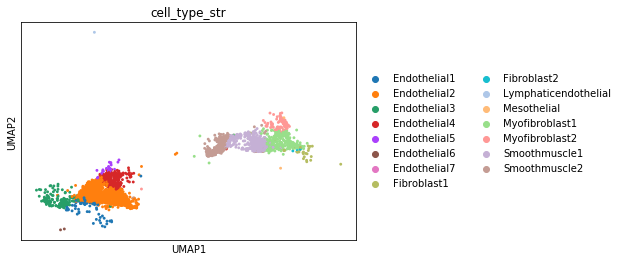

In [19]:
sc.pl.umap(mapped_carcinoid_data_str, color='cell_type_str')

... storing 'orig.ident' as categorical
... storing 'sample_id_old' as categorical
... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'patient_id_old' as categorical
... storing 'tissue_type' as categorical
... storing 'W_no' as categorical
... storing 'topography' as categorical
... storing 'morphology' as categorical
... storing 'histo_subtype' as categorical
... storing 'tnm' as categorical
... storing 'sex' as categorical
... storing 'Phase' as categorical
... storing 'cell_type_imm_refined' as categorical


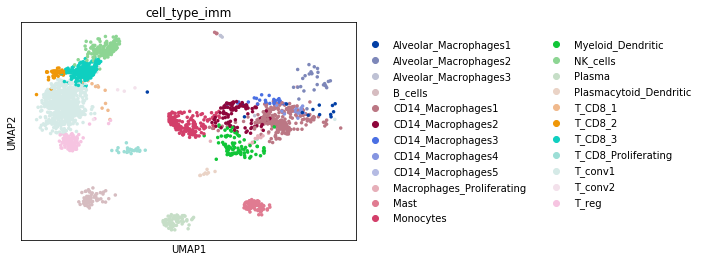

In [20]:
sc.pl.umap(mapped_carcinoid_data_imm, color='cell_type_imm')

... storing 'orig.ident' as categorical
... storing 'sample_id' as categorical
... storing 'patient_id' as categorical
... storing 'tissue_type' as categorical
... storing 'W_no' as categorical
... storing 'topography' as categorical
... storing 'morphology' as categorical
... storing 'histo_subtype' as categorical
... storing 'tnm' as categorical
... storing 'sex' as categorical
... storing 'frozen' as categorical
... storing 'ffpe' as categorical
... storing 'cell_type_imm' as categorical


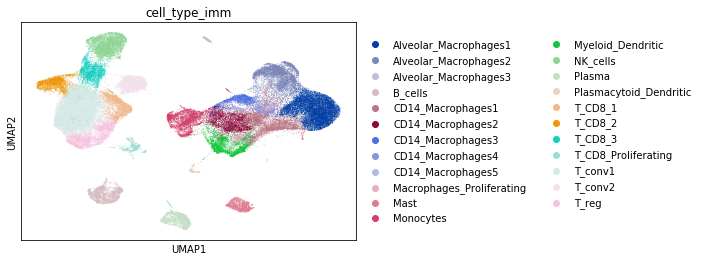

In [21]:
sc.pl.umap(nsclc_data_imm, color='cell_type_imm')